# Q1
(40%) Decision Tree Algorithms Use Python to solve the problem. The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 
observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1: bad), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1: good). The dataset can be collected from UCI machine learning repository. 

### (a) (5%) Construct a data science framework and show the data summary

DataScience Framework

1.   定義要解決的問題，解決方法和分析目標
2.   收集資料或熟悉資料集，了解每個欄位所代表的意義以及欄位內容
3.   分析欄位特徵或資料EDA，針對資料進行合適前處理
4.   選用數個符合目標和資料型態的模型進行分析，利用驗證資料集做模型的效能評估
5.   比較模型間的表現，並根據結果提出分析與改善



In [3]:
import pandas as pd
df = pd.read_excel('/content/MDS_Assignment3_SECOM.xlsx',sheet_name='secom',index_col='Unnamed: 0')
df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [4]:
df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### (b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

#### 重複columns

In [5]:
duplicate_col = df.T.duplicated()
df_dup = df[duplicate_col[duplicate_col==True].index]
display(df_dup)
print('total value of duplicate columns: ', df_dup.sum(axis=0).sum())

,Sensor_150,Sensor_180,Sensor_187,Sensor_190,Sensor_192,Sensor_193,Sensor_194,Sensor_195,Sensor_227,Sensor_230,...,Sensor_530,Sensor_531,Sensor_532,Sensor_533,Sensor_534,Sensor_535,Sensor_536,Sensor_537,Sensor_538,Sensor_539
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1565,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


total value of duplicate columns:  0.0


In [6]:
# Drop duplicate columns
# 591 - 104 + 1 = 488
df_ = df.T.drop_duplicates(keep='first').T
print('columns after drop identical column: ', df_.shape[1])
df_

columns after drop identical column:  488


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.9,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.52,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


#### 重複rows

In [7]:
# 檢查是否有重複的資料
dup_index = df_[df_.duplicated()==True]
dup_index.index

Int64Index([], dtype='int64')

#### Missing Value

In [8]:
missing_val = df_.isna().sum(axis=0)
missing_val = missing_val[missing_val>0]
print('Count of Missing value amount:\n')
print(missing_val.value_counts())

Count of Missing value amount:

2       84
1       83
6       60
24      39
3       21
7       20
14      18
9       16
8       12
260     12
1018    12
4       10
273      8
51       8
1429     4
12       4
715      4
1341     4
794      4
10       4
949      4
5        3
dtype: int64


In [9]:
# Remove column with nan > 70%
missing_percentage = missing_val/df_.shape[0]
nan_drop = missing_percentage[missing_percentage>0.7]
print('Columns to drop:\n', nan_drop)
df_preprocess = df_.drop(columns=nan_drop.index)
print('\nDataframe shape after preprocessing: ',df_preprocess.shape)
display(df_preprocess)

Columns to drop:
 Sensor_86     0.855775
Sensor_158    0.911934
Sensor_159    0.911934
Sensor_221    0.855775
Sensor_293    0.911934
Sensor_294    0.911934
Sensor_359    0.855775
Sensor_493    0.855775
dtype: float64

Dataframe shape after preprocessing:  (1567, 480)


,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.9,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.52,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


#### Split dataset

In [10]:
from sklearn.model_selection import train_test_split

X = df_preprocess.iloc[:,:-2]
y = df_preprocess.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (1253, 478)
X_test shape:  (314, 478)


#### Impute missing value

In [11]:
# impute with mean
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

### (c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from matplotlib import pyplot as plt

#### Classification Tree

In [20]:
# cast label to int
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

print('Label type: ',y_train.dtype)
print('Label type: ',y_test.dtype)

print(y_train.value_counts())
print(y_test.value_counts())

Label type:  int64
Label type:  int64
-1    1171
 1      82
Name: Label, dtype: int64
-1    292
 1     22
Name: Label, dtype: int64


In [123]:
from sklearn.tree import DecisionTreeClassifier
f1_list = []
acc_list = []
depth = (np.arange(20)+1)
tree_param = {'criterion':['gini','entropy'],'max_depth':depth}
score = ['f1','accuracy']
print('Tuning hyperparameters:\n ', tree_param)

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
              param_grid=tree_param,
              scoring=score,
              refit='f1',
              return_train_score=True,
              cv=10)
grid_search.fit(X_train, y_train)
print('best params: ',grid_search.best_params_)
print('best score: ',grid_search.best_score_)

Tuning hyperparameters:
  {'criterion': ['gini', 'entropy'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}
best params:  {'criterion': 'entropy', 'max_depth': 12}
best score:  0.23965776595639293


In [124]:
f1_result = []; acc_result = []
f1_train = []; acc_train = []

for i in range(10):
  # 選用best param = entropy，所以取後面20個(前20個是gini)
  f1 = grid_search.cv_results_.get('split{}_test_f1'.format(i))[-20:]
  acc = grid_search.cv_results_.get('split{}_test_accuracy'.format(i))[-20:]
  f1_tr = grid_search.cv_results_.get('split{}_train_f1'.format(i))[-20:]
  acc_tr = grid_search.cv_results_.get('split{}_train_accuracy'.format(i))[-20:]
  f1_result.append(f1)
  acc_result.append(acc)
  f1_train.append(f1_tr)
  acc_train.append(acc_tr)

f1_result_df = pd.DataFrame(f1_result)
acc_result_df = pd.DataFrame(acc_result)
f1_train_df = pd.DataFrame(f1_train)
acc_train_df = pd.DataFrame(acc_train)


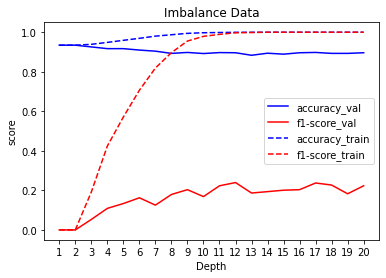

In [130]:
# plot relation between depth and accuracy/f1-score
plt.title('Imbalance Data')
plt.plot(depth, acc_result_df.sum(axis=0)/10, color='blue')
plt.plot(depth, f1_result_df.sum(axis=0)/10, color='red')
plt.plot(depth, acc_train_df.sum(axis=0)/10, color='blue', linestyle='dashed')
plt.plot(depth, f1_train_df.sum(axis=0)/10, color='red', linestyle='dashed')
plt.xlabel('Depth')
plt.ylabel('score')
plt.xticks(depth)
plt.legend(['accuracy_val','f1-score_val','accuracy_train','f1-score_train'])
plt.show()

### (d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset. 
(hint: undersampling or oversampling)

針對不平衡資料集有兩個主要的處理方式
1. Oversampling：使用SMOTE，透過人工合成新樣本產生新的資料點，將minor class的數量oversample到major class的數量
2. Undersampling：透過對major class的採樣，隨機選出與minor class數量一樣多的樣本點

此資料集因為minor class數量只有104個，若選用undersampling會有資料數量過少的問題，因此選擇使用oversampling，將minor classe做過採樣，使minor class數量 = major class數量



### (e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [148]:
''' Note:tree_param中關於model的參數調整名稱必須與pipeline中的分類器名稱對應到
  中間再加上'__' '''
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

f1_list_bal = []
acc_list_bal = []
depth = (np.arange(20)+1)
tree_param = {'model__criterion':['gini','entropy'],'model__max_depth':depth}

score = ['f1','accuracy']
print('Tuning hyperparameters:\n ', tree_param)

pipeline = Pipeline(steps = [['smote', SMOTE(random_state=27)],
          ['model', DecisionTreeClassifier()]])

grid_search_balance = GridSearchCV(estimator=pipeline,
                  param_grid=tree_param,
                  scoring=score,
                  refit='f1',
                  return_train_score=True,
                  cv=10)
grid_search_balance.fit(X_train, y_train)
print('best params: ',grid_search_balance.best_params_)
print('best score: ',grid_search_balance.best_score_)

Tuning hyperparameters:
  {'model__criterion': ['gini', 'entropy'], 'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}
best params:  {'model__criterion': 'gini', 'model__max_depth': 8}
best score:  0.24386920117804678


In [149]:
f1_result_bal = []; acc_result_bal = []
f1_train_bal = []; acc_train_bal = []

for i in range(10):
  # 選用best param = gini，所以取前面20個
  f1 = grid_search.cv_results_.get('split{}_test_f1'.format(i))[:20]
  acc = grid_search.cv_results_.get('split{}_test_accuracy'.format(i))[:20]
  f1_train = grid_search.cv_results_.get('split{}_train_f1'.format(i))[:20]
  acc_train = grid_search.cv_results_.get('split{}_train_accuracy'.format(i))[:20]

  f1_result_bal.append(f1)
  acc_result_bal.append(acc)
  f1_train_bal.append(f1_train)
  acc_train_bal.append(acc_train)

f1_result_bal_df = pd.DataFrame(f1_result_bal)
acc_result_bal_df = pd.DataFrame(acc_result_bal)
f1_train_bal_df = pd.DataFrame(f1_train_bal)
acc_train_bal_df = pd.DataFrame(acc_train_bal)

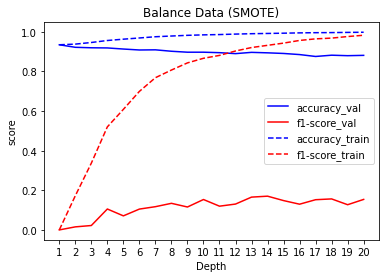

In [150]:
# plot relation between depth and accuracy/f1-score
plt.title('Balance Data (SMOTE)')
plt.plot(depth, acc_result_bal_df.sum(axis=0)/10, color='blue')
plt.plot(depth, f1_result_bal_df.sum(axis=0)/10, color='red')
plt.plot(depth, acc_train_bal_df.sum(axis=0)/10, color='blue', linestyle='dashed')
plt.plot(depth, f1_train_bal_df.sum(axis=0)/10, color='red', linestyle='dashed')

plt.xlabel('Depth')
plt.ylabel('score')
plt.xticks(depth)
plt.legend(['accuracy_val','f1-score_val','accuracy_train','f1-score_train'])
plt.show()

## (f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

Accuracy score:  0.8757961783439491
F1 score:  0.04878048780487805
AUC:  0.4919053549190535
[[274  18]
 [ 21   1]]
--------SMOTE---------
Accuracy score with Smote:  0.8280254777070064
F1 score　with Smote:  0.15624999999999997
AUC　with Smote:  0.4539227895392279
[[255  37]
 [ 17   5]]


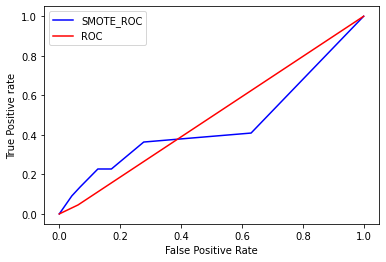

In [219]:
from sklearn.metrics import roc_curve
y_pred_bal = grid_search_balance.predict(X_test)
y_pred_bal_prob = grid_search_balance.predict_proba(X_test)
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)

print('Accuracy score: ',accuracy_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))
print('AUC: ',roc_auc_score(y_test, y_pred_prob[:,1]))
print(confusion_matrix(y_test,y_pred))
print('--------SMOTE---------')
print('Accuracy score with Smote: ',accuracy_score(y_test,y_pred_bal))
print('F1 score　with Smote: ',f1_score(y_test,y_pred_bal))
print('AUC　with Smote: ',roc_auc_score(y_test, y_pred_bal_prob[:,1]))
print(confusion_matrix(y_test,y_pred_bal))


fpr_bal,tpr_bal,_ = roc_curve(y_test, y_pred_bal_prob[:,1])
fpr,tpr,_ = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr_bal, tpr_bal, color='blue')
plt.plot(fpr, tpr, color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(['SMOTE_ROC','ROC'])

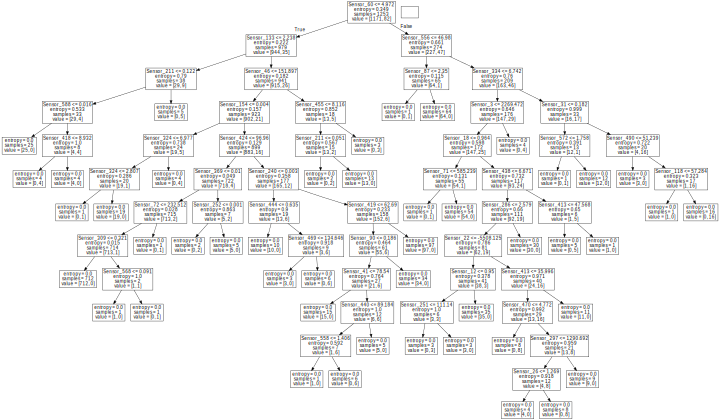

In [196]:
# 畫decision tree
from graphviz import Source
from sklearn import tree
import pydot
data = tree.export_graphviz(grid_search.best_estimator_, out_file=None, feature_names=X.columns)
dot = pydot.graph_from_dot_data(data)

dot[0].set_graph_defaults(size = "\"10,10\"")
dec_tree = Source(dot[0].to_string())
dec_tree

Accuracy:  0.8375796178343949
F1 score　with Smote:  0.19047619047619044


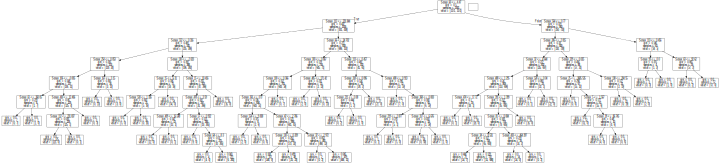

In [215]:
tree_ = DecisionTreeClassifier(criterion="gini", max_depth=8)
sm = SMOTE(random_state=27)
X_res, y_res = sm.fit_resample(X_train, y_train)
tree_.fit(X_res, y_res)
y_pred_ = tree_.predict(X_test)
print('Accuracy: ',tree_.score(X_test, y_test))
print('F1 score　with Smote: ',f1_score(y_test,y_pred_))
data = tree.export_graphviz(tree_, out_file=None, feature_names=X.columns)
dot = pydot.graph_from_dot_data(data)

dot[0].set_graph_defaults(size = "\"10,10\"")
dec_tree = Source(dot[0].to_string())
dec_tree

## (g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.